In [111]:
from typing import List, TypedDict
from langgraph.graph import StateGraph,START,END
import random

class AgentState(TypedDict):
    name: str
    number: List[int]
    counter: int
    

In [112]:
def greeting_node(state: AgentState) -> AgentState:
    state['name'] = 'hola ' + state['name'] + ', que tal?'
    state['counter'] = 0
    state['number'] = []
    return state

def random_node(state: AgentState) -> AgentState:
    state['number'].append(random.randint(0,10))
    state['counter'] += 1
    
    return state

def router_random_node(state: AgentState):
    if state['counter'] < 5:
        print(f'vuelta: {state['counter']}')
        print(state['number'])
        return 'repeat'
    else:
        return 'end'
    

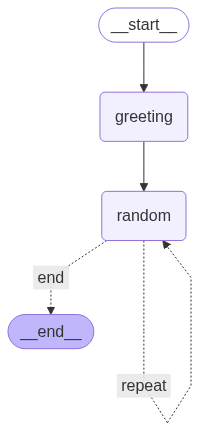

In [113]:
graph = StateGraph(AgentState)

graph.add_node('greeting', greeting_node)
graph.add_node('random', random_node)

graph.add_edge(START, 'greeting')
graph.add_edge('greeting', 'random')
graph.add_conditional_edges('random',
                            router_random_node,
                            {'repeat':'random', 'end':END})


app = graph.compile()
app

In [114]:
app.invoke({'name':'Alex'})

vuelta: 1
[2]
vuelta: 2
[2, 6]
vuelta: 3
[2, 6, 7]
vuelta: 4
[2, 6, 7, 3]


{'name': 'hola Alex, que tal?', 'number': [2, 6, 7, 3, 5], 'counter': 5}